In [2]:
!pip install pandas numpy scikit-learn xgboost optuna kagglehub matplotlib seaborn joblib plotly imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
import os
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import imblearn
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score

In [4]:
path2 = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path2)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [5]:
data_path2 = os.path.join(path2, "creditcard.csv")

In [6]:
df = pd.read_csv(data_path2)
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
df["Class"].value_counts()

,count
Class,
0,284315
1,492


In [8]:
stats = df["Amount"].describe()
stats

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


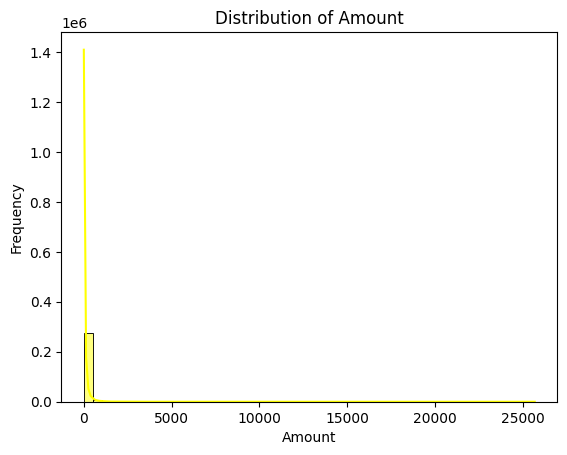

In [9]:
# Plot the distribution of the 'Amount' column
filtered_data = df[df["Amount"] > 0]["Amount"]

sns.histplot(filtered_data, bins=50, kde=True, color="yellow")
# plt.yscale('log')
plt.title("Distribution of Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

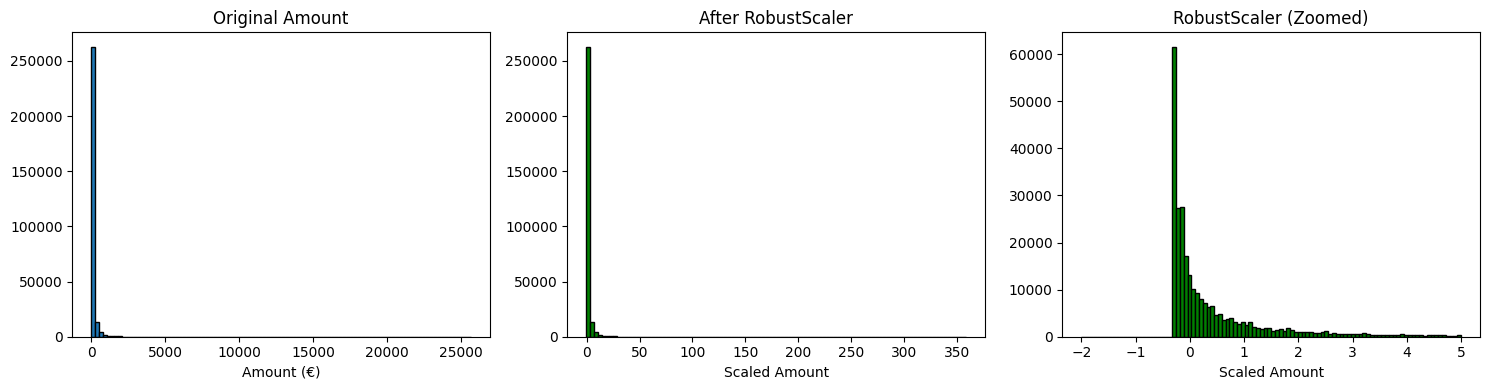

In [10]:
from sklearn.preprocessing import RobustScaler


scaler_robust = RobustScaler()
df['Amount_Robust'] = scaler_robust.fit_transform(df[['Amount']])

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df['Amount'], bins=100, edgecolor='black')
axes[0].set_title('Original Amount')
axes[0].set_xlabel('Amount (€)')

axes[1].hist(df['Amount_Robust'], bins=100, edgecolor='black', color='green')
axes[1].set_title('After RobustScaler')
axes[1].set_xlabel('Scaled Amount')

# RobustScaler
axes[2].hist(df['Amount_Robust'], bins=100, range=(-2, 5), edgecolor='black', color='green')
axes[2].set_title('RobustScaler (Zoomed)')
axes[2].set_xlabel('Scaled Amount')

plt.tight_layout()
plt.show()

In [11]:
print("RobustScaler Statistics:")
print(df['Amount_Robust'].describe())

RobustScaler Statistics:
count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount_Robust, dtype: float64


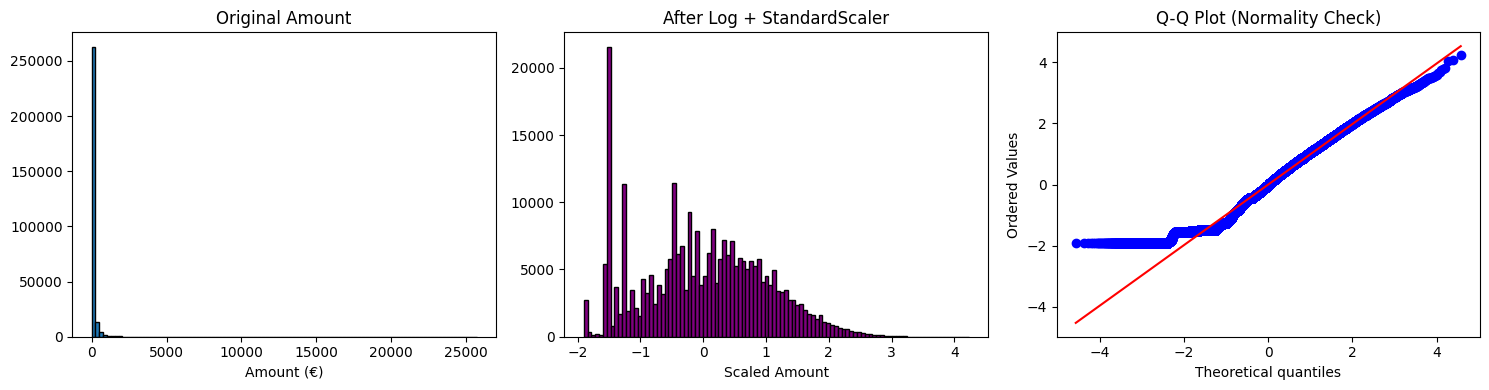

In [12]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Apply Log + StandardScaler
df['Amount_Log'] = np.log1p(df['Amount'])
scaler_std = StandardScaler()
df['Amount_Log_Std'] = scaler_std.fit_transform(df[['Amount_Log']])

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df['Amount'], bins=100, edgecolor='black')
axes[0].set_title('Original Amount')
axes[0].set_xlabel('Amount (€)')

axes[1].hist(df['Amount_Log_Std'], bins=100, edgecolor='black', color='purple')
axes[1].set_title('After Log + StandardScaler')
axes[1].set_xlabel('Scaled Amount')

stats.probplot(df['Amount_Log_Std'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot (Normality Check)')

plt.tight_layout()
plt.show()

In [13]:
print("Log + StandardScaler Statistics:")
print(df['Amount_Log_Std'].describe())
print(f"Skewness: {stats.skew(df['Amount_Log_Std']):.2f}")

Log + StandardScaler Statistics:
count    2.848070e+05
mean     9.420447e-17
std      1.000002e+00
min     -1.902754e+00
25%     -7.636627e-01
50%     -1.007690e-02
75%      7.283598e-01
max      4.226464e+00
Name: Amount_Log_Std, dtype: float64
Skewness: 0.16


In [14]:
drop_columns = ["Time", "Amount", "Amount_Robust", "Amount_Log"]

In [15]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_Robust', 'Amount_Log', 'Amount_Log_Std'],
      dtype='object')

In [16]:
df.drop(columns=drop_columns, inplace=True)

In [17]:
print("Remaining columns:", df.columns)

Remaining columns: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount_Log_Std'],
      dtype='object')


In [18]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df.loc[:, df.columns != 'Class'],
                                                                            df['Class'], test_size=0.2, random_state=34666, stratify=df['Class'])

In [19]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
X_train.columns

X_train shape: (227845, 29)
y_train shape: (227845,)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_Log_Std'],
      dtype='object')

In [20]:
from imblearn.over_sampling import SMOTE
n_legitimate = sum(y_train == 0)
n_fraud = sum(y_train == 1)

print(f"Original frauds: {n_fraud}")

target_frauds_conservative = int(n_fraud * 1.5)

smote_conservative = SMOTE(sampling_strategy={1: target_frauds_conservative}, random_state=3366)
X_train_1_5x, y_train_1_5x = smote_conservative.fit_resample(X_train, y_train)

print(f"After SMOTE (1.5×): {sum(y_train_1_5x == 1)} frauds")
print(f"Created {sum(y_train_1_5x == 1) - n_fraud} synthetic frauds")

Original frauds: 394
After SMOTE (1.5×): 591 frauds
Created 197 synthetic frauds


In [21]:
model = nn.Sequential(
    nn.Linear(29, 128),
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.3),

    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(32, 1),
    nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=29, out_features=128, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=32, out_features=1, bias=True)
  (10): Sigmoid()
)


In [22]:
X_train_tensor = torch.FloatTensor(X_train_1_5x.values)
y_train_tensor = torch.FloatTensor(y_train_1_5x).unsqueeze(1)

X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.FloatTensor(y_test.values).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f'Training samples: {len(train_dataset)}')
print(f'Test samples: {len(test_dataset)}')

Training samples: 228042
Test samples: 56962


In [29]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 50

In [37]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

if torch.cuda.is_available():
    print(f'GPU Name: {torch.cuda.get_device_name(0)}')
    print(f'GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB')

Using device: cuda
GPU Name: Tesla T4
GPU Memory: 15.64 GB


In [31]:
from sklearn.metrics import precision_recall_curve, auc

best_pr_auc = 0

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    if (epoch + 1) % 5 == 0:
        model.eval()
        val_loss = 0.0
        all_preds_proba = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                all_preds_proba.extend(outputs.numpy())
                all_labels.extend(labels.numpy())

        all_preds_proba = np.array(all_preds_proba).flatten()
        all_labels = np.array(all_labels).flatten()

        avg_val_loss = val_loss / len(test_loader)

        # Calculate PR-AUC
        precision, recall, _ = precision_recall_curve(all_labels, all_preds_proba)
        pr_auc = auc(recall, precision)

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, PR-AUC: {pr_auc:.4f}')

        if pr_auc > best_pr_auc:
            best_pr_auc = pr_auc
            torch.save(model.state_dict(), 'best_model.pth')

        model.train()

Epoch [5/50], Train Loss: 0.0014, Val Loss: 0.0110, PR-AUC: 0.8289
Epoch [10/50], Train Loss: 0.0018, Val Loss: 0.0127, PR-AUC: 0.8181
Epoch [15/50], Train Loss: 0.0015, Val Loss: 0.0084, PR-AUC: 0.7879
Epoch [20/50], Train Loss: 0.0012, Val Loss: 0.0133, PR-AUC: 0.8236
Epoch [25/50], Train Loss: 0.0011, Val Loss: 0.0109, PR-AUC: 0.8221
Epoch [30/50], Train Loss: 0.0010, Val Loss: 0.0126, PR-AUC: 0.8177
Epoch [35/50], Train Loss: 0.0010, Val Loss: 0.0157, PR-AUC: 0.8098
Epoch [40/50], Train Loss: 0.0009, Val Loss: 0.0205, PR-AUC: 0.8097
Epoch [45/50], Train Loss: 0.0009, Val Loss: 0.0138, PR-AUC: 0.8090
Epoch [50/50], Train Loss: 0.0009, Val Loss: 0.0120, PR-AUC: 0.8155


In [40]:
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

def objective(trial):
    # Hyperparameters
    n_layers = trial.suggest_int('n_layers', 2, 4)
    hidden_size_1 = trial.suggest_categorical('hidden_size_1', [64, 128, 256, 512])
    hidden_size_2 = trial.suggest_categorical('hidden_size_2', [32, 64, 128, 256])
    hidden_size_3 = trial.suggest_categorical('hidden_size_3', [16, 32, 64])
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128, 256, 512])

    # Build model
    layers = []

    layers.append(nn.Linear(29, hidden_size_1))
    layers.append(nn.ReLU())
    layers.append(nn.Dropout(dropout_rate))

    layers.append(nn.Linear(hidden_size_1, hidden_size_2))
    layers.append(nn.ReLU())
    layers.append(nn.Dropout(dropout_rate))

    if n_layers >= 3:
        layers.append(nn.Linear(hidden_size_2, hidden_size_3))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_rate))
        output_input = hidden_size_3
    else:
        output_input = hidden_size_2

    if n_layers == 4:
        hidden_size_4 = trial.suggest_categorical('hidden_size_4', [8, 16, 32])
        layers.append(nn.Linear(output_input, hidden_size_4))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_rate))
        output_input = hidden_size_4

    layers.append(nn.Linear(output_input, 1))
    layers.append(nn.Sigmoid())

    model = nn.Sequential(*layers).to(device)

    # DataLoader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.BCELoss()

    epochs = 35
    model.train()

    for epoch in range(epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            all_probs.extend(outputs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_probs = np.array(all_probs).flatten()
    all_labels = np.array(all_labels).flatten()

    # Calculate PR-AUC
    pr_auc = average_precision_score(all_labels, all_probs)

    return pr_auc

In [41]:
import optuna
from optuna.trial import Trial

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print('\nBest trial:')
print(f'  Recall: {study.best_trial.value:.4f}')
print(f'  Params:')
for key, value in study.best_trial.params.items():
    print(f'    {key}: {value}')

[I 2026-02-12 07:02:39,482] A new study created in memory with name: no-name-55f9ab54-acb4-45e3-9c74-7bf84036af21


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-02-12 07:08:12,983] Trial 0 finished with value: 0.803516687297101 and parameters: {'n_layers': 3, 'hidden_size_1': 64, 'hidden_size_2': 32, 'hidden_size_3': 64, 'dropout_rate': 0.1676371076109029, 'learning_rate': 0.004529388369154535, 'batch_size': 64}. Best is trial 0 with value: 0.803516687297101.
[I 2026-02-12 07:10:31,802] Trial 1 finished with value: 0.8337681458136023 and parameters: {'n_layers': 4, 'hidden_size_1': 128, 'hidden_size_2': 256, 'hidden_size_3': 16, 'dropout_rate': 0.3531484235228084, 'learning_rate': 0.00014786156600415885, 'batch_size': 256, 'hidden_size_4': 16}. Best is trial 1 with value: 0.8337681458136023.
[I 2026-02-12 07:12:11,124] Trial 2 finished with value: 0.7573333731054951 and parameters: {'n_layers': 4, 'hidden_size_1': 64, 'hidden_size_2': 256, 'hidden_size_3': 32, 'dropout_rate': 0.4411182591763121, 'learning_rate': 7.02005103196811e-05, 'batch_size': 512, 'hidden_size_4': 32}. Best is trial 1 with value: 0.8337681458136023.
[I 2026-02-12 

In [56]:
fig = optuna.visualization.plot_optimization_history(study)
fig.update_layout(width=1200, height=600, title_font_size=20, font=dict(size=14))
fig.show()

In [57]:
fig = optuna.visualization.plot_param_importances(study)
fig.update_layout(width=1200, height=700, title_font_size=20, font=dict(size=14))
fig.show()

In [58]:
fig = optuna.visualization.plot_parallel_coordinate(study)
fig.update_layout(width=1400, height=700, title_font_size=20, font=dict(size=14))
fig.show()

/tmp/ipython-input-4107911785.py:2: ExperimentalWarning: optuna.visualization.matplotlib._slice.plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study)
/tmp/ipython-input-4107911785.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 2400x1600 with 0 Axes>

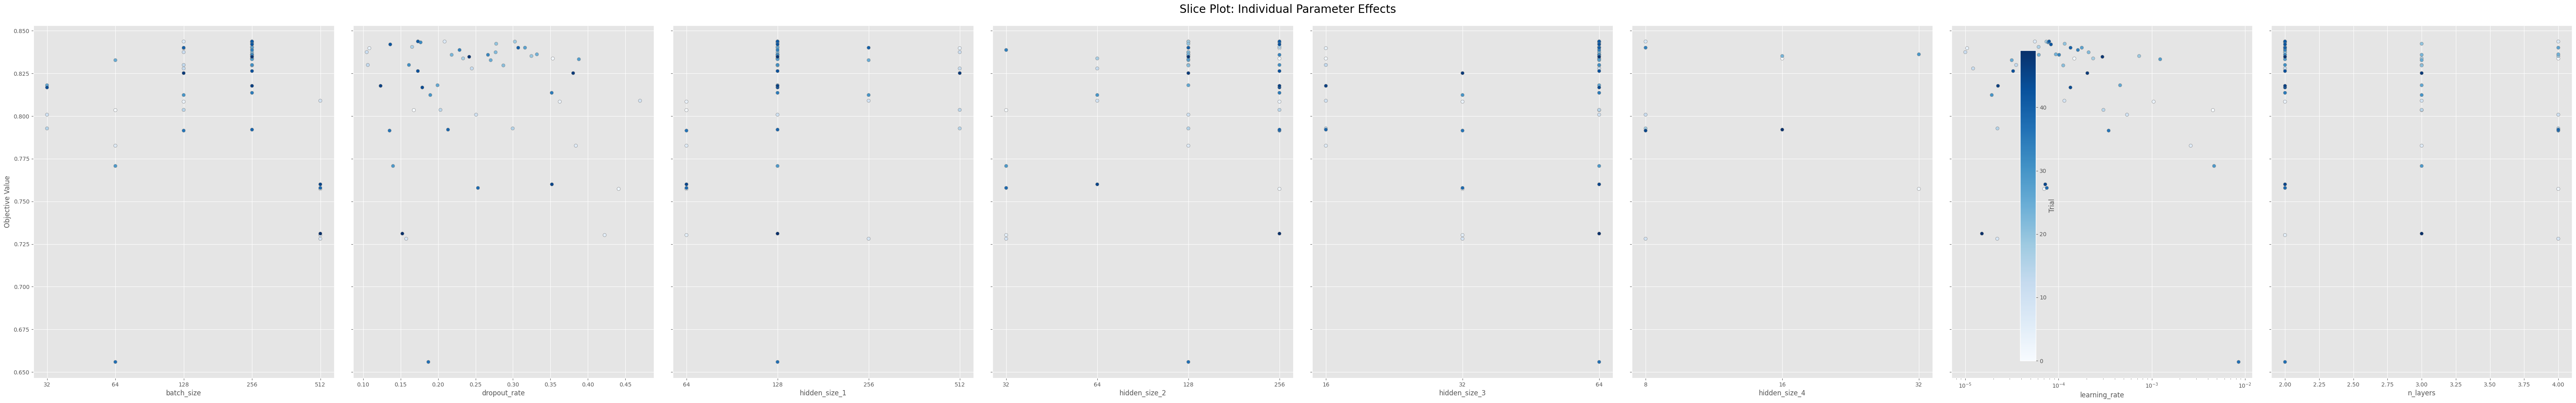

In [51]:
fig = plt.figure(figsize=(24, 16))
optuna.visualization.matplotlib.plot_slice(study)
plt.suptitle('Slice Plot: Individual Parameter Effects', fontsize=20, y=0.995)
plt.tight_layout()
plt.show()

In [59]:
fig = optuna.visualization.plot_slice(study)
fig.update_layout(width=1400, height=1000, title_font_size=20, font=dict(size=14))
fig.show()

In [60]:
fig = optuna.visualization.plot_contour(study, params=['learning_rate', 'dropout_rate'])
fig.update_layout(width=1200, height=1000, title_font_size=20, font=dict(size=14))
fig.show()

In [61]:
fig = optuna.visualization.plot_edf(study)
fig.update_layout(width=1200, height=600, title_font_size=20, font=dict(size=14))
fig.show()

In [62]:
best_trials = sorted(study.trials, key=lambda t: t.value if t.value is not None else 0, reverse=True)[:5]

print("TOP 5 TRIALS:")
for i, trial in enumerate(best_trials):
    print(f"\n{i+1}. Trial {trial.number}: PR-AUC = {trial.value:.6f}")
    print(f"   Params: {trial.params}")

TOP 5 TRIALS:

1. Trial 41: PR-AUC = 0.843789
   Params: {'n_layers': 2, 'hidden_size_1': 128, 'hidden_size_2': 256, 'hidden_size_3': 64, 'dropout_rate': 0.1730918984602124, 'learning_rate': 7.936363994966443e-05, 'batch_size': 256}

2. Trial 7: PR-AUC = 0.843727
   Params: {'n_layers': 4, 'hidden_size_1': 128, 'hidden_size_2': 128, 'hidden_size_3': 64, 'dropout_rate': 0.2087232456305415, 'learning_rate': 5.58344547175829e-05, 'batch_size': 128, 'hidden_size_4': 8}

3. Trial 18: PR-AUC = 0.843685
   Params: {'n_layers': 2, 'hidden_size_1': 128, 'hidden_size_2': 128, 'hidden_size_3': 64, 'dropout_rate': 0.30255320811050634, 'learning_rate': 7.41957147087373e-05, 'batch_size': 256}

4. Trial 32: PR-AUC = 0.843240
   Params: {'n_layers': 2, 'hidden_size_1': 128, 'hidden_size_2': 256, 'hidden_size_3': 64, 'dropout_rate': 0.17664987794280315, 'learning_rate': 7.765958687461102e-05, 'batch_size': 256}

5. Trial 20: PR-AUC = 0.842427
   Params: {'n_layers': 3, 'hidden_size_1': 128, 'hidden_si

In [64]:
print("BEST TRIAL:")
print(f"Trial {study.best_trial.number}")
print(f"PR-AUC: {study.best_trial.value:.6f}")
print(f"Params:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")

BEST TRIAL:
Trial 41
PR-AUC: 0.843789
Params:
  n_layers: 2
  hidden_size_1: 128
  hidden_size_2: 256
  hidden_size_3: 64
  dropout_rate: 0.1730918984602124
  learning_rate: 7.936363994966443e-05
  batch_size: 256


In [65]:
import joblib
joblib.dump(study, 'optuna_study.pkl')
print('Study saved!')

Study saved!
